# Transformaciones habituales en Deep Learning

In [1]:
from keras.utils import to_categorical, normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## LabelEncoder

Convierte array con valores de cualquier tipo a un array con de valores enteros, donde cada entero corresponde a uno de los valores presentes en el array original.

Los enteros asignados comienzan en cero y son consecutivos.

In [2]:
niveles = ['alto', 'medio', 'medio', 'bajo', 'nulo', 'bajo']
labenc = LabelEncoder()
# Entrenamiento: array con todos los valores posibles (clases):
labenc.fit(niveles)

# Codificación: conversión de un vector:
niveles_enc = labenc.transform(niveles)
print(niveles,'->',niveles_enc)

# Listado de las clases detectadas -> el entero asignado a cada una coincide con su posición:
print('Clases detectadas:', labenc.classes_)

# Transformación inversa: dado un array de enteros devuelve el array con las clases correspondientes:
cod = [0,1,1,2,1,3]
print('Descodificación:',cod, '->', labenc.inverse_transform(cod))

['alto', 'medio', 'medio', 'bajo', 'nulo', 'bajo'] -> [0 2 2 1 3 1]
Clases detectadas: ['alto' 'bajo' 'medio' 'nulo']
Descodificación: [0, 1, 1, 2, 1, 3] -> ['alto' 'bajo' 'bajo' 'medio' 'bajo' 'nulo']


## Codificación One-hot con Keras

Genera una columna para cada valor detectado. La entrada debe ser un array de enteros comenzando en cero. También genera una columna para los valores enteros no detectados.

In [3]:
y = np.array(niveles_enc)
yoh = to_categorical(y)
print(y)
print(yoh)

[0 2 2 1 3 1]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


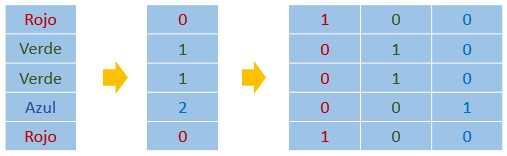

## Codificación One-hot con Pandas

Genera una columna para cada valor detectado. La entrada puede ser de cualquier tipo y formato. A diferencia de `to_categorical`, no genera columnas innecesarias.


#### A partir de una lista de valores (array, serie, etc.)

In [4]:
niveles = ['alto', 'medio', 'medio', 'bajo', 'nulo', 'bajo', np.nan]
print(niveles,"\n")
oh = pd.get_dummies(niveles) # devuelve dataframe
print(oh,"\n")

['alto', 'medio', 'medio', 'bajo', 'nulo', 'bajo', nan] 

   alto  bajo  medio  nulo
0     1     0      0     0
1     0     0      1     0
2     0     0      1     0
3     0     1      0     0
4     0     0      0     1
5     0     1      0     0
6     0     0      0     0 



Con una columna propia para el valor NaN:

In [5]:
ohNan = pd.get_dummies(niveles, dummy_na=True)
print(ohNan,"\n")

   alto  bajo  medio  nulo  NaN
0     1     0      0     0    0
1     0     0      1     0    0
2     0     0      1     0    0
3     0     1      0     0    0
4     0     0      0     1    0
5     0     1      0     0    0
6     0     0      0     0    1 



#### A partir de un DataFrame

Las columnas numéricas no se codifican:

In [6]:
df = pd.DataFrame({'A': ['a', 'b', 'a'],
                   'B': ['d', 'a', 'c'],
                   'C': [1, 2, 3]})
print(df,'\n')
print(pd.get_dummies(df))


   A  B  C
0  a  d  1
1  b  a  2
2  a  c  3 

   C  A_a  A_b  B_a  B_c  B_d
0  1    1    0    0    0    1
1  2    0    1    1    0    0
2  3    1    0    0    1    0


Para que se codifiquen las columnas enteras, hay que especificar las columnas a usar:

In [7]:
print(df,'\n')
print(pd.get_dummies(df, columns=['B', 'C'])) # la columna A se excluye

   A  B  C
0  a  d  1
1  b  a  2
2  a  c  3 

   A  B_a  B_c  B_d  C_1  C_2  C_3
0  a    0    0    1    1    0    0
1  b    1    0    0    0    1    0
2  a    0    1    0    0    0    1


## Normalización

Escalado de la información (por columnas) de forma que los valores estén en el intervalo [0,1].

Esta técnica necesita una estimación precisa del los valores mínimos y máximos de las variables de entrada:

*y = (x – min) / (max – min)*

Los valores NaN no se tienen en cuenta en el entrenamiento y se mantienen en la transformación.

In [8]:
# datos de entrada
datosEntr = np.array([[30, 0.3],
				              [3,  0.05],
				              [10, 0.001],
				              [15, 0.1],
				              [2,  0.9]])


# se crea el normalizador
escMM = MinMaxScaler()

# entrenamiento del normalizador
escMM.fit(datosEntr)

# transformación de los datos
datos = np.array([[20, 0.001],
				          [4,  0.15],
				          [2,  0.8]])
print(datos,"\n")

datosNorm = escMM.transform(datos)
print(datosNorm,"\n")

# entrenamiento y transformación simultáneos:
# datosNorm = escMM.fit_transform(datos)

# transformación inversa (recuperación de los datos originales):
recup = escMM.inverse_transform(datosNorm)
print(recup)

[[2.0e+01 1.0e-03]
 [4.0e+00 1.5e-01]
 [2.0e+00 8.0e-01]] 

[[0.64285714 0.        ]
 [0.07142857 0.16573971]
 [0.         0.88876529]] 

[[2.0e+01 1.0e-03]
 [4.0e+00 1.5e-01]
 [2.0e+00 8.0e-01]]


## Normalización con tensorflow.keras.utils.normalize

Permite seleccionar el tipo de normalización a usar (L1, L2, etc.) con el argumento `order`, que por defecto vale 2:
- L1: La suma de los valores absolutos de los valores es 1
- L2: La suma de los cuadrados de los valores es 1


In [9]:
print("\nDatos de prueba:")
print(datosEntr)

print("\nMinMaxScaler:")
print(escMM.transform(datosEntr),"\n")

print("\nL1 por columnas:")
print(normalize(datosEntr, axis=0, order=1),"\n")

print("\nL1 por filas:")
print(normalize(datosEntr, axis=1, order=1),"\n") # id: normalize(datosEntr, order=1)



Datos de prueba:
[[3.0e+01 3.0e-01]
 [3.0e+00 5.0e-02]
 [1.0e+01 1.0e-03]
 [1.5e+01 1.0e-01]
 [2.0e+00 9.0e-01]]

MinMaxScaler:
[[1.         0.33259177]
 [0.03571429 0.05450501]
 [0.28571429 0.        ]
 [0.46428571 0.11012236]
 [0.         1.        ]] 


L1 por columnas:
[[0.5        0.22205774]
 [0.05       0.03700962]
 [0.16666667 0.00074019]
 [0.25       0.07401925]
 [0.03333333 0.66617321]] 


L1 por filas:
[[9.90099010e-01 9.90099010e-03]
 [9.83606557e-01 1.63934426e-02]
 [9.99900010e-01 9.99900010e-05]
 [9.93377483e-01 6.62251656e-03]
 [6.89655172e-01 3.10344828e-01]] 



## Estandarización con StandardScaler

Escalado de los datos para que su media sea cero y su desviación estándar 1:

-  *y = (x – promedio) / desviación_estándar*

-  con *desviación_estándar = sqrt( sum( (x – promedio)^2 ) / count(x))*

Es útil cuando la información de estrada viene en escalas diferentes. La estandarización solo se debe aplicar si los datos presentan una distribución gausiana.


In [10]:
# datos de entrada: los mismos que en el ejemplo anterior

# se crea el estandarizador
escSS = StandardScaler()

# entrenamiento del estandarizador
escSS.fit(datosEntr)

# transformación de los datos
datos = np.array([[20, 0.001],
				          [4,  0.15],
				          [2,  0.8]])
print(datos,"\n")

datosEst = escSS.transform(datos)
print(datosEst,"\n")

# entrenamiento y transformación simultáneos:
# datosEst = escSS.fit_transform(datos)

# transformación inversa (recuperación de los datos originales):
recup = escSS.inverse_transform(datosEst)
print(recup)

[[2.0e+01 1.0e-03]
 [4.0e+00 1.5e-01]
 [2.0e+00 8.0e-01]] 

[[ 0.78597749 -0.81354868]
 [-0.78597749 -0.36325613]
 [-0.98247186  1.60110732]] 

[[2.0e+01 1.0e-03]
 [4.0e+00 1.5e-01]
 [2.0e+00 8.0e-01]]
